In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("Day_18_Tours_and_Travels.csv")
print(df.head())


   Booking_ID Destination  Package_Price  Customer_Age  Rating  \
0           1      London         1094.0          21.0     NaN   
1           2       Paris          640.0          20.0     NaN   
2           3   Singapore         3393.0          42.0     3.0   
3           4      London         3555.0          40.0     4.0   
4           5       Dubai         2130.0          44.0     2.0   

           Review_Text Travel_Date  
0  Amazing experience!  2023-01-01  
1      Loved the trip!  2023-01-02  
2      Could be better  2023-01-03  
3  Amazing experience!  2023-01-04  
4   Highly recommended  2023-01-05  


In [2]:
print("Missing Values Before Handling:\n", df.isnull().sum())


Missing Values Before Handling:
 Booking_ID        0
Destination      27
Package_Price    20
Customer_Age     15
Rating           25
Review_Text      20
Travel_Date      10
dtype: int64


In [3]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].mean())


In [4]:
df

,Booking_ID,Destination,Package_Price,Customer_Age,Rating,Review_Text,Travel_Date
0,1,London,1094.0,21.0,3.116667,Amazing experience!,2023-01-01
1,2,Paris,640.0,20.0,3.116667,Loved the trip!,2023-01-02
2,3,Singapore,3393.0,42.0,3.000000,Could be better,2023-01-03
3,4,London,3555.0,40.0,4.000000,Amazing experience!,2023-01-04
4,5,Dubai,2130.0,44.0,2.000000,Highly recommended,2023-01-05
...,...,...,...,...,...,...,...
500,441,New York,1600.0,64.0,3.000000,Highly recommended,2024-03-16
501,487,Dubai,2875.0,66.0,4.000000,Loved the trip!,2024-05-01
502,432,London,2532.0,21.0,3.000000,Amazing experience!,2024-03-07
503,383,Dubai,1375.0,34.0,4.000000,Highly recommended,2024-01-18


In [5]:
df['Rating'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
500    False
501    False
502    False
503    False
504    False
Name: Rating, Length: 505, dtype: bool

In [6]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df = df.drop_duplicates()


Number of duplicate rows: 5


In [7]:
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]


In [9]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


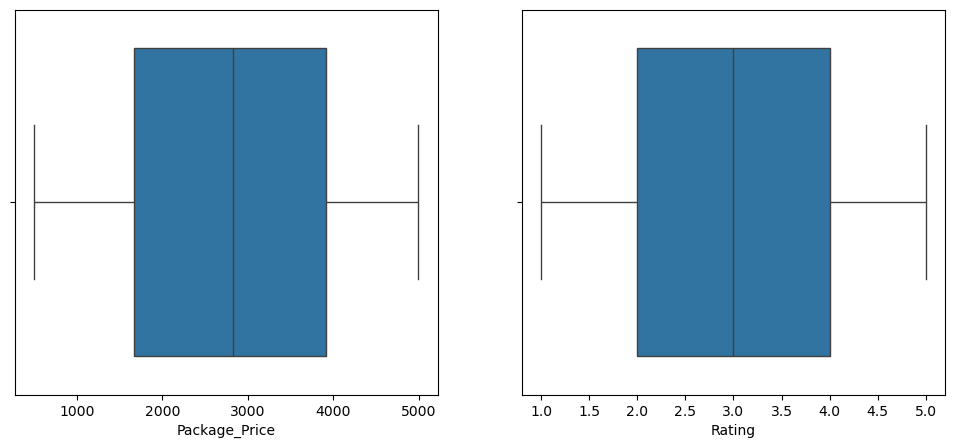

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['Package_Price'], ax=axes[0])
sns.boxplot(x=df['Rating'], ax=axes[1])
plt.show()


In [15]:
Q1 = df[['Package_Price', 'Rating']].quantile(0.25)
Q3 = df[['Package_Price', 'Rating']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Package_Price', 'Rating']] < (Q1 - 1.5 * IQR)) | (df[['Package_Price', 'Rating']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Package_Price'] = label_encoder.fit_transform(df['Package_Price'])


In [21]:
df.to_csv("cleaned_travel_reviews.csv", index=False)
print("Dataset cleaned and saved successfully!")


Dataset cleaned and saved successfully!
